In [363]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')

In [366]:
df = pd.read_csv('results-survey250319.csv')
df = df.drop(df.columns[[range(0,6)]], axis=1)
df.rename(columns={df.columns[0]: 'Country', df.columns[1]: 'Business Category'\
                   , df.columns[2]: 'Business Category [Business Category - Other]'\
                   , df.columns[12]: 'Campaign Run'}, inplace=True)

df['Country'].replace(np.nan, "Other", inplace=True)

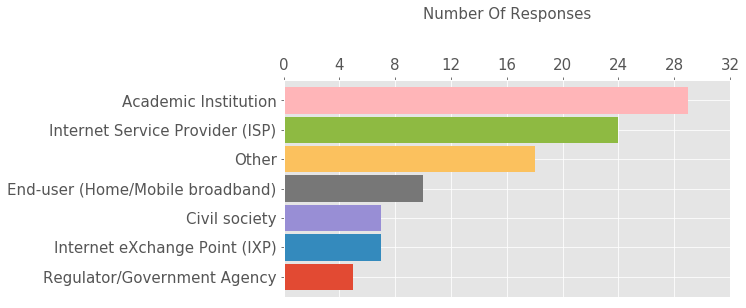

In [368]:
#Number of Responses by Business Category with [Other] answers included
def network_responses():
    business_category = ['3._What_type_of_network_are_you_operating?_[FTTX]',
 '3._What_type_of_network_are_you_operating?_[ADSL]',
 '3._What_type_of_network_are_you_operating?_[Mobile_(2G,_3G,_LTE,_LTE-A)]',
 '3._What_type_of_network_are_you_operating?_[Wireless_network_(WIFI,_Wimax)]',
 '3._What_type_of_network_are_you_operating?_[IP_Transit_Services/Wholesale]',
 '3._What_type_of_network_are_you_operating?_[Community_network_(Mesh_network)]',
 '3._What_type_of_network_are_you_operating?_[Local_Area_Network]',
 '3._What_type_of_network_are_you_operating?_[N/A]',
 '3._What_type_of_network_are_you_operating?_[Other]']
    
    
    col = df['Business Category'].value_counts()
    other = df['Business Category [Business Category - Other]'
              ].value_counts()
    #new = pd.concat([col1, other], axis=0)
    
    
    #Adding major categories
    ispsum = col.loc['Telecom (Mobile) Operator'] + col.loc['Wireless network'] 
    col.loc['Internet Service Provider (ISP)'] += ispsum
    col.loc['Academic Institution'] += col.loc['Academic network (NRENs)']
    col.loc['Internet eXchange Point (IXP)']
    grouped = col.loc['Community Network'] + col.loc['Enterprise Network'] \
    + col.loc['ccTLD/DNS Operator'] + col.loc['Datacentre']
    col.loc['Other'] += grouped
    
    col.drop(['Academic network (NRENs)', 'Telecom (Mobile) Operator', 'Wireless network',\
             'Enterprise Network', 'Community Network', 'ccTLD/DNS Operator',\
             'Datacentre'], inplace=True)

    
    col = col.sort_values()
    ax = col.plot(kind='barh', figsize=(8,4), legend=False, width=.9, grid=True)
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    xticks = [0, 4, 8, 12, 16, 20, 24, 28, 32]
    plt.xticks(xticks, fontsize=15)
    plt.xlabel("Number Of Responses\n\n", fontsize=15)
    plt.yticks(fontsize=15)
    plt.show()
    return 
network_responses()

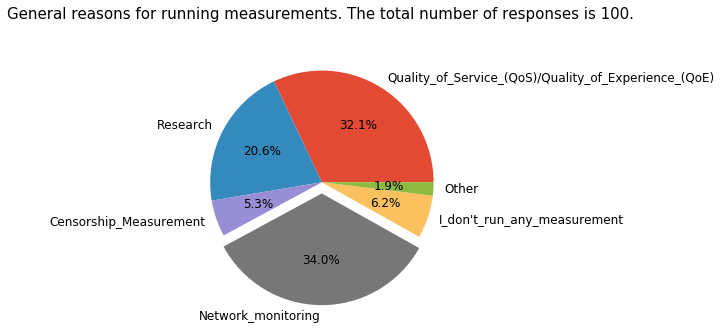

In [362]:
#General reasons for running measurement
def reasons_for_measurement():
    df2 = df[reasons]
    freq = []
    purpose = []
    for col in df2.columns:
        if col == "6._Please_state_your_main_purpose_for_running_network_measurements?_[Other]":
            new_purpose = tuple(df2[col].dropna().unique())
            for purp in new_purpose:
                freq.append(1)
                purpose.append(purp)
        else:
            value = len(df2[df2[col]=="Yes"])
            freq.append(value)
            ntype = col.split('[')[1].split(']')[0]
            purpose.append(ntype)
    values = zip(purpose, freq)
    final = dict(set(values))
    #plot piechart by combining all entries with less than one percent of the total as others
    dsum = sum(final.values())
    dthresh = dsum * 0.01
    includedict = {}
    excludedict = {}
    
    for k, v in final.items():
        if v >= dthresh:
            includedict.update({k:v})
        else:
            excludedict.update({k:v})
            others = sum(excludedict.values())
    
    total_resp = len(df2.index)
    includedict.update({'Other':others})
    y = includedict.values()
    label = includedict.keys()
    plt.pie([float(v) for v in y], labels=[k for k in label],
            autopct='%1.1f%%', explode = (0, 0, 0, 0.1, 0, 0))
    plt.axis('equal')
    plt.rcParams['font.size'] = 12
    plt.tight_layout()
    plt.title("General reasons for running measurements. The total number of responses is {}.\n\n".
              format(total_resp), fontsize=15)
    plt.show()
    
    return 
reasons_for_measurement()

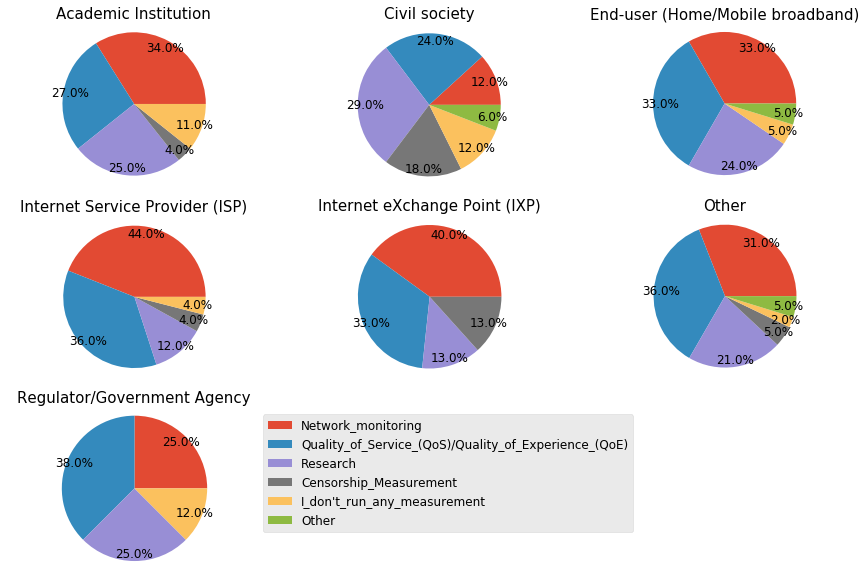

In [369]:
#Specific reasons why business categories are running measurements
def specific_reasons():
    
    columns =['Business Category','6._Please_state_your_main_purpose_for_running_network_measurements?_[Network_monitoring]',
              '6._Please_state_your_main_purpose_for_running_network_measurements?_[Quality_of_Service_(QoS)/Quality_of_Experience_(QoE)]',
              '6._Please_state_your_main_purpose_for_running_network_measurements?_[Research]',
              '6._Please_state_your_main_purpose_for_running_network_measurements?_[Censorship_Measurement]',
              "6._Please_state_your_main_purpose_for_running_network_measurements?_[I_don't_run_any_measurement]",
              '6._Please_state_your_main_purpose_for_running_network_measurements?_[Other]']

    df2 = df[columns]
    df2.replace(('Yes', 'No','Academic network (NRENs)', 'Telecom (Mobile) Operator','Wireless network',
                'Enterprise Network','ccTLD/DNS Operator','Community Network','Datacentre'),
                (1, 0, 'Academic Institution', 'Internet Service Provider (ISP)',
                 'Internet Service Provider (ISP)', 'Other', 'Other', 'Other', 'Other'), inplace=True)
    
    for col in df2.columns[1:]:
        name = col.split('[')[1].split(']')[0]
        df2.rename(columns={col:name}, inplace=True)
    
    df2['Other'] = df2['Other'].notnull().astype(int)
    df2.fillna(value={'Other':0}, inplace=True)
   
    df3 = df2.groupby('Business Category', as_index=False).sum()
    df3.set_index('Business Category', inplace=True)

    
    fig = plt.figure(figsize=(15,10))

    for i, (name, row) in enumerate(df3.iterrows()):
        ax = plt.subplot(3,3, i+1)
        ax.set_title(row.name, fontsize=15)
        ax.set_aspect('equal')
        ax.pie(row, autopct=lambda p: '{:.1f}%'.format(round(p)) if p > 0 else '', 
               pctdistance=0.9, labels=None)
        ax.axis('equal')
    plt.legend(loc="best", labels=row.index, bbox_to_anchor=(1,1))
    plt.show()
    return
specific_reasons()